## P4DS (ODL1) Assignment 3

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020.11.03, revised 2021.03.02)

# _Analysing the Impact of Covid-19 on European Countries_


#### Student: _Loukas Tsouroplis_

#### Email: od21lt@leeds.ac.uk

# Project Plan

## The Data (10 marks)

The data used for this project comes from ECDC, the European Agency for Disease Prevention and Control, an official agent of the European Union. There are two datasets that are used as part of this project,the official report of the ECDC daily covid cases/deaths across the EU/EEA area and the vaccination data from the same region. These datasets can be found on the following links:
[Link 1](https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country)
[Link 2](https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea)

The dataset for the cases/deaths consists of 13 columns in total excluding the indexes. They are date, day, month, year, country, new cases for that date, new deaths for that date, country code, country geographical code, country population and continent. It is important to note that this dataset contains the data only from the 1st of March 2021 until the 28th of October 2021. Data before March were reported on a weekly basis and are part of a different dataset. By observing the dataset, it becomes apparent that some piece of data do not offer any new information. For example we can identify the day/month/year by looking at the respective columns and as a result the date string is redundant. The same also applies to countries which have 3 different identifiers, while the continent column offers nothing as obviously this dataset concerns european countries only. Later when analysing this data we can trim some of these columns so the dataset becomes smaller and easier to handle with a computer programme.

The dataset for the vaccine data consists of 12 columns in total excluding the indexes. These are the year-week ISO( week of the year identifier), number of first doses administered, number of first doses refused, number of second doses administered, number of unknown doses administered, number of doses supplied to that country, region , country, population, target group, vaccine and denominator. The official and more detailed data dictionary can be found here. At first sight it is clear that the various european countries have a different reporting system. For instance, some countries report by region while some countries don't and just use the country identifier in the region column. It is important to keep that in mind when performing the analysis further down the road.

These datasets are constructed from ECDC using the official reports for covid cases/deaths of member states, so as a result  they are the most accurate data available for the EU area. However there are a couple caveats that need to be noted. Firstly, the number of covid cases per country heavily depends on how many covid tests that specific country performs per day. Some countries may not invest heavily in detecting covid so as a result they have lower numbers in new cases. Secondly, since all the data mentioned above describes countries that differ in population significantly, we have to keep in mind that raw numbers offer minimal insight on the covid impact, with percentages and ratios being better descriptors of the situation.

## Project Aim and Objectives (5 marks)

The Covid-19 pandemic has had a great impact on everyday life for the past two years. The general aim of this project is to take some very simple daily reported data for each European country, like daily covid cases, deaths and vaccine doses administred, and convert them to more meaningful information that can give a better insight on the situation so far across Europe. In more detail, the following three steps summarise the aim of this project:

1. The fatality rate of the virus is measured for each European country. The fatality rate equals the total number of covid deaths divided by the number of covid cases and is used to described in common terms how deadly the virus is. The fatality rate is a very useful indicator for two reasons. Firstly, the average fatality rate is a good indicator to determine the actual death rate of covid, and secondly it is important to see if the death rate varies significantly between different countries and why.

2. The total cases per 100.000 population are calculated. The official report for each country usually contains the new cases for each day as a simple number. However in order to compare the overall situation between countries and see where covid is more pervalent, it is important to convert those numbers to a ratio per 100.000 population, which allows to compare numbers on equal terms. This ratio is calculated using the following formula:(Events occurance)*100.00/Population. This ratio is afterwards used to classify countries according to covid risk level. Although there is no standard framework to assess risk levels and each authority may use a different model, this project uses a framework developed by the Harvard Global Health Institute and can be found online [here](https://ethics.harvard.edu/files/center-for-ethics/files/key_metrics_and_indicators_v4.pdf).

3. The correlation between vaccine doses administered and deaths from covid is found. A negative correlation is a good indicative that the vaccines do indeed offer strong protection againist death from covid. To calculate the correlation the following mathematical formula is used: , which is the standard method when using the pandas' built-in correlation function.


### Specific Objective(s)

* __Objective 1:__ _Measure the fatality rate of each country._ 
* __Objective 2:__ _Calculate the case per population ratio and classify countries according to covid risk level._
* __Objective 3:__ _Find the correlation between vaccination and death rates._ 

## System Design (5 marks)


### Architecture

The following flowchart describes the flow of the programme. Each time a module is run we get a new stage which is described in the task section. Meanwhile the boxes represent the dataframes that exist in the memory. Some abbreviations are used. FR stands for fatality rate while DF for dataframe.
![image info](https://i.imgur.com/NUayboT.jpg)
  
### Processing Modules and Algorithms

* _Read the data from the online source directly to a pandas dataframe. and trim data parts that are not needed for this project._
* _Join different datasets based on a common column._
* _Perform mathematical calculations between data, like fatality rate and cases per 100,000 population._
* _Visualise data to illustrate the analysis results using graphs and maps._
* _Run a simple algorithm to classify countries according to covid risk level( check the Harvard Framework linked above)._
* _Find Pearson's Corellation between two columns of a dataframe._

# Program Code (15 marks)



#### _Importing packages and reading the data_

_In the following code snippet all python packages that are required for this project are imported and the data from the online source is loaded into two pandas' dataframes. The first 5 rows of each dataframe is  printed to confirm that the data was successfully read._

In [2]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import geopandas as gpd

df_cases = pandas.read_csv('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv', encoding='UTF-8')
df_vacc = pandas.read_csv('https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv', encoding='UTF-8')
#Read the csv from the link the ECDC provides into a pandas dataframe.
print(df_cases.head(5))
print(df_vacc.head(5))
#Print the first 5 rows of the dataframe to confirm it was sucessfully read.


      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  29/10/2021   29     10  2021   4232      13                 Austria    AT   
1  28/10/2021   28     10  2021   4407      18                 Austria    AT   
2  27/10/2021   27     10  2021   3388      13                 Austria    AT   
3  26/10/2021   26     10  2021   2765      15                 Austria    AT   
4  25/10/2021   25     10  2021   3655       1                 Austria    AT   

  countryterritoryCode  popData2020 continentExp  
0                  AUT      8901064       Europe  
1                  AUT      8901064       Europe  
2                  AUT      8901064       Europe  
3                  AUT      8901064       Europe  
4                  AUT      8901064       Europe  
  YearWeekISO  FirstDose  FirstDoseRefused  SecondDose  UnknownDose  \
0    2020-W53          0               NaN           0            0   
1    2020-W53          0               NaN           0            0   


#### _Deleting unneccesary information_

_Since this is not an ongoing project and we know exactly what kind of analysis we want to do beforehand, it is safe to delete some columns that either offer information already given by another column(i.e. country name and country code), or delete columns that give information not needed as part of this project._

In [3]:
del df_cases['continentExp']
del df_cases['dateRep']
#del df_cases['countriesAndTerritories']
del df_cases['countryterritoryCode']
del df_vacc['FirstDoseRefused']
del df_vacc['NumberDosesReceived']
del df_vacc['Region']
del df_vacc['TargetGroup']
del df_vacc['Vaccine']
del df_vacc['Denominator']
del df_vacc['YearWeekISO']
#Delete columns not used at all further down the analysis

print(df_cases.head(5))
print(df_vacc.head(5))
#Check the new format of our dataframes

   day  month  year  cases  deaths countriesAndTerritories geoId  popData2020
0   29     10  2021   4232      13                 Austria    AT      8901064
1   28     10  2021   4407      18                 Austria    AT      8901064
2   27     10  2021   3388      13                 Austria    AT      8901064
3   26     10  2021   2765      15                 Austria    AT      8901064
4   25     10  2021   3655       1                 Austria    AT      8901064
   FirstDose  SecondDose  UnknownDose  Population ReportingCountry
0          0           0            0     8901064               AT
1          0           0            0     8901064               AT
2          0           0            0     8901064               AT
3       5141           0            0     8901064               AT
4          0           0            0     8901064               AT


#### _A note on deleting columns_

_In general it is not advisable to delete information from our data. Although they may not be needed currently, the scope of the analysis may change in the future. However in this instance, where the project will not be an ongoing system, some columns were deleted to make the debugging part easier and faster, plus make the different outputs of the programme more compact._

#### _Check for NaNs_

_Now that we have removed unused columns from our dataframes, we should perform one last step before starting the actual analysis, which is to check the entire dataframes for any NaN values._

In [4]:
df_cases.isnull().values.any()
df_vacc.isnull().values.any()


False

_The above function returned false, which means that no NaN values were found. We now know that there are no missing/placeholder data._

#### _Objective 1: Calculate the fatality rate_

_To get the fatality rate for each country, first the total amount of deaths and cases have to be calculated. Afterwards this info is passed to another dataframe where the fatality rate is calculated as a new column. The new dataframe is going to be much smaller so it is more efficient to calculate the rate at the new dataframe and avoid redundant calculations._

In [5]:
df_cases['sumcases'] = df_cases['cases'].groupby(df_cases['geoId']).transform('sum')
#Find the sum of column named 'cases' by 'geoId' and add it to a new column name 'sumcases'
df_cases['sumdeaths'] = df_cases['deaths'].groupby(df_cases['geoId']).transform('sum')
#Similar with above

df_total=df_cases.drop_duplicates(subset = ["geoId"]).copy()
#Sum is the same for all rows of each country, so drop duplicates

df_total['fatalityrate%'] = (100* df_total['sumdeaths']/df_total['sumcases'])
#Find fatality rate in percentage form
del df_total['day']
del df_total['month']
del df_total['year']
del df_total['cases']
del df_total['deaths']
#Since we dropped duplicates the columns deleted above make no sense in the new dataframe
print(df_total.head(5))
# Print 5 rows to check

    countriesAndTerritories geoId  popData2020  sumcases  sumdeaths  \
0                   Austria    AT      8901064    810157      11055   
243                 Belgium    BE     11522440   1351818      25976   
486                Bulgaria    BG      6951482    592943      23718   
729                 Croatia    HR      4058165    458090       9142   
972                  Cyprus    CY       888005    124017        571   

     fatalityrate%  
0         1.364550  
243       1.921560  
486       4.000047  
729       1.995678  
972       0.460421  


#### _Objective 2a: Calculate cases per 100,000 population_

_To calculate the cases per 100,000 population, first the seven-day average for new case has to be found according to the latest date. As a result only the rows that contain the final 7 days of the data are kept and the rest are deleted. Afterwards the sum of cases and deaths is calculated like in objective 1, but now accounting only for 7 days of the reported data. The end result of the objective is inserted into the casespercapita column._

In [6]:
df_7day=df_cases.copy()
df_7day=df_7day.loc[(df_7day['day'] >= 22) & (df_7day['month'] == 10)]
#Dataset used is from 28th so last 7 days are 28,27,26,25,24,23,22
df_7day['sumcases'] = df_7day['cases'].groupby(df_7day['geoId']).transform('sum')
#sum of cases for last 7 days
df_7day['sevenavg'] = df_7day['sumcases']/7
#divide by 7 to get average
df_7day=df_7day.drop_duplicates(subset = ["geoId"])
#drop duplicates since all rows contain the same average per geoId
#df_7day.drop(df_7day.columns[[0,1,2,3,4,7,8]], axis = 1, inplace = True)
#delete columns by position that were copied from df_cases and make no sense with no duplicates
df_7day['casespercapita']=df_7day['sevenavg']*100000/df_7day['popData2020']
#calculate case per capita
print(df_7day.head(5))

     day  month  year  cases  deaths countriesAndTerritories geoId  \
0     29     10  2021   4232      13                 Austria    AT   
243   29     10  2021      0       0                 Belgium    BE   
486   29     10  2021   5178     124                Bulgaria    BG   
729   29     10  2021   4154      26                 Croatia    HR   
972   29     10  2021    109       0                  Cyprus    CY   

     popData2020  sumcases  sumdeaths     sevenavg  casespercapita  
0        8901064     29546      11055  4220.857143       47.419692  
243     11522440     35599      25976  5085.571429       44.136237  
486      6951482     37866      23718  5409.428571       77.816911  
729      4058165     24954       9142  3564.857143       87.844066  
972       888005      1165        571   166.428571       18.741851  


#### _Objective 2b: Classify countries according to covid risk level_

_At this step the dataframe is iterated and each row is assigned a value according to the framework used. This value is stored in the new risklevel column._

In [7]:
df_7day['risklevel']=''
#add new empty column
for i, row in df_7day.iterrows():
    if  df_7day.loc[i,'casespercapita'] >25:
        df_7day.loc[i,'risklevel'] = 'red'
    elif df_7day.loc[i,'casespercapita'] >10:
        df_7day.loc[i,'risklevel'] = 'orange'
    elif df_7day.loc[i,'casespercapita'] >1:
        df_7day.loc[i,'risklevel'] = 'yellow'
    else:
        df_7day.loc[i,'risklevel'] = 'green'
#iterate columns and add colour according to Harvard framework
print(df_7day)

      day  month  year  cases  deaths countriesAndTerritories geoId  \
0      29     10  2021   4232      13                 Austria    AT   
243    29     10  2021      0       0                 Belgium    BE   
486    29     10  2021   5178     124                Bulgaria    BG   
729    29     10  2021   4154      26                 Croatia    HR   
972    29     10  2021    109       0                  Cyprus    CY   
1215   29     10  2021   4385      16                 Czechia    CZ   
1458   29     10  2021   1847       1                 Denmark    DK   
1701   29     10  2021   1679      11                 Estonia    EE   
1944   29     10  2021    673       4                 Finland    FI   
2187   29     10  2021   6461      33                  France    FR   
2430   29     10  2021  24668     121                 Germany    DE   
2673   29     10  2021   2957      31                  Greece    EL   
2916   29     10  2021   4041      37                 Hungary    HU   
3159  

#### _Objective 3a: Find  vaccine doses per 100.000 population  per country_

_Similar to previous scenarios, we have to find the sum of the vaccine dosages administered by each country. The only difference here is that we have to sum 3 different columns, for the 1st,2nd and unknown dosages._

In [8]:
target_columns = ['FirstDose', 'SecondDose', 'UnknownDose']
#mark columns to be summed
df_vacc['AllDose']= df_vacc[target_columns].sum(axis=1)
#sum per row for now
df_vacc['SumDoses'] = df_vacc['AllDose'].groupby(df_vacc['ReportingCountry']).transform('sum')
#sum new made column AllDose into SumDoses
df_vacc=df_vacc.drop_duplicates(subset = ["ReportingCountry"])
#drop duplicates
df_vacc['dosepercapita']= df_vacc['SumDoses']*100000/df_vacc['Population']
df_vacc.drop(df_vacc.columns[[0,2,1,5]], axis = 1, inplace = True)
print(df_vacc.head(5))

      Population ReportingCountry  SumDoses  dosepercapita
0        8901064               AT  22276142  250263.811158
2640    11522440               BE  33618910  291769.017673
4326     6951482               BG   5611540   80724.369278
5932      888005               CY   2383203  268377.205083
7382    10693939               CZ  24952081  233329.187683


#### _Objective 3b: Find  covid deaths per 100.000 population  per country_

_Similar to previous scenarios, we have to find the sum of the vaccine dosages administered by each country. The only difference here is that we have to sum 3 different columns, for the 1st,2nd and unknown dosages._

In [9]:
df_total['deathspercapita']= df_total['sumdeaths']*100000/df_total['popData2020']
#df_vacc.drop(df_vacc.columns[[0,2,1,4,5,3,9,10,11,6,7,12]], axis = 1, inplace = True)
print(df_total)

     countriesAndTerritories geoId  popData2020  sumcases  sumdeaths  \
0                    Austria    AT      8901064    810157      11055   
243                  Belgium    BE     11522440   1351818      25976   
486                 Bulgaria    BG      6951482    592943      23718   
729                  Croatia    HR      4058165    458090       9142   
972                   Cyprus    CY       888005    124017        571   
1215                 Czechia    CZ     10693939   1752086      30705   
1458                 Denmark    DK      5822763    382796       2709   
1701                 Estonia    EE      1328976    190201       1502   
1944                 Finland    FI      5525292    156959       1154   
2187                  France    FR     67320216   7146755     117622   
2430                 Germany    DE     83166711   4559120      95606   
2673                  Greece    EL     10718565    731167      15801   
2916                 Hungary    HU      9769526    863419      3

#### _Objective 3c: Combining data from different datasets_

_We have calculated the deaths and doses administered per 100,000 population for each country. Before we calculate the corellation between the two though, it is essential to match each value from one dataset to the other._

In [10]:
df_total['dosepercapita'] = df_total.geoId.map(df_vacc.set_index('ReportingCountry')['dosepercapita'])
#map the dosepercapita from df_vacc to df_total according to geoId=ReportingCountry
print(df_total)

     countriesAndTerritories geoId  popData2020  sumcases  sumdeaths  \
0                    Austria    AT      8901064    810157      11055   
243                  Belgium    BE     11522440   1351818      25976   
486                 Bulgaria    BG      6951482    592943      23718   
729                  Croatia    HR      4058165    458090       9142   
972                   Cyprus    CY       888005    124017        571   
1215                 Czechia    CZ     10693939   1752086      30705   
1458                 Denmark    DK      5822763    382796       2709   
1701                 Estonia    EE      1328976    190201       1502   
1944                 Finland    FI      5525292    156959       1154   
2187                  France    FR     67320216   7146755     117622   
2430                 Germany    DE     83166711   4559120      95606   
2673                  Greece    EL     10718565    731167      15801   
2916                 Hungary    HU      9769526    863419      3

#### _Objective 3d: Find corellation between vaccine rate and death rate_

_We have calculated the deaths and doses administered per 100,000 population for each country. Before we calculate the corellation between the two though, it is essential to match each value from one dataset to the other._

In [11]:
g=df_total['deathspercapita'].corr(df_total['dosepercapita'])
print(g)

-0.2855131011220151


# Project Outcome (10 + 10 marks)

## Overview of Results
By now we have run all code modules and seen the output of each one. A brief observation of the data is enough to see that there is a negative correlation between death and vaccination rates in EU as a whole. Moreover the data from the last 7 days show that currently there is no single country in the EU where the virus is contained(green colour), with them majority of them being in red state, meaning that regardless of death rates covid is rapidly spreading. Finally there seems to be a big variation between the fatality rates for each country. Let's see however each objective set at the beginning of the project separately and provide some visualisations.

## Objective 1: Fatality rate of each country

### Explanation of Results

_The following bar chart gives a  representation of the distribution of fatality rates for each European country. Bulgaria, Romania and Hungary seem to lead the "race" in fatality rates whilst Cyprus, Norway and Iceland come last. It is apparent even at a first glance that there is a significant variance among european countries. For instance Bulgaria, has a circa 4% fatality rate which is nearly 8 times greater than that of Cyprus. The code snippet underneath the bar chart calculates the coefficient variation(CV) for the fatality rates percentage. As a general rule of thumb a CV>1 is considered to be high which is also the case here. This variance could be the result of low vaccination rates in some countries or different strategies in treating it that proved less effective._

### Visualisation

<AxesSubplot:title={'center':'Fatality Rate per European Country'}, xlabel='Country', ylabel='Fatality Rate'>

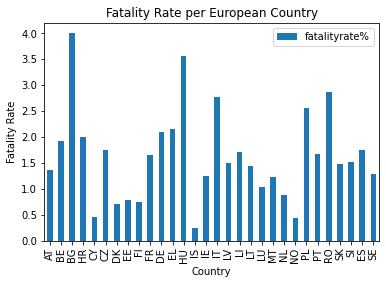

In [12]:
df_total.plot(kind='bar',x='geoId',y='fatalityrate%',xlabel='Country',ylabel='Fatality Rate', title='Fatality Rate per European Country')

In [13]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
cv(df_total['fatalityrate%'])

54.02157919615409

## Objective 2: Covid Risk Classification
### Explanation of Results

According to the framework used for covid risk classification, a country contains the virus if it is labeled as green, whilst yellow, orange and red mean that the virus is spreading. The output of the objective 2 code snippet showed that zero countries fell in the green area. This is confirmed by the visualisation shown below. A map was of Europe was drawn using geopandas. The countries are coloured according to their risk level. Countries in gray/black are not part of the data. It is clear that all of Europe is in high covid risk currently. This is a sign that despite efforts made and the vaccine programme rollout the pandemic is still not under control and further preventive measures may be required in the future.

### Visualisation

C:\Users\Loukas\anaconda3\envs\my_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\Loukas\anaconda3\envs\my_env\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


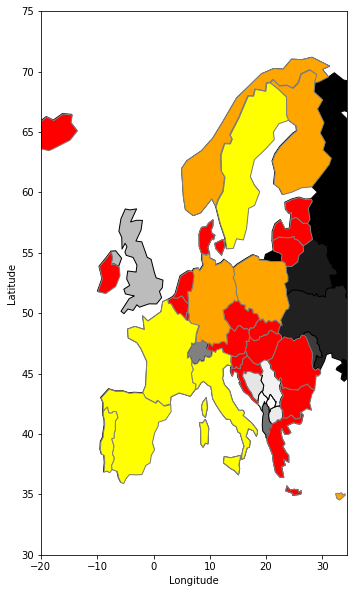

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# or plot Africa continent

ax2 = world[world.continent == 'Europe'].plot(figsize=(10,10), edgecolor=u'black', cmap='gray')
t_array = df_7day[['countriesAndTerritories','risklevel']].to_numpy()
ax2.set_ylim([30, 75])
ax2.set_xlim([-20, 34.4])

for row in t_array:
    val1 = row[0]
    val2 = row[1]
    if  val2 =='red':
        world[world.name == val1].plot(edgecolor=u'gray', color='red', ax=ax2)
    elif val2=='orange':
        world[world.name == val1].plot(edgecolor=u'gray', color='orange', ax=ax2)
    elif val2=='yellow':
        world[world.name == val1].plot(edgecolor=u'gray', color='yellow', ax=ax2)
    else:
        world[world.name == val1].plot(edgecolor=u'gray', color='green', ax=ax2)

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

_Some error messages appear. They seem to happen because the border/map for countries is downloaded from external source due to geopandas._

## Objective 3: Correlation between death and vaccination rates
### Explanation of Results

The correlation matrix underneath shows that there is a negative correlation between the values of deathspercapita and dosepercapita. It is expected that vaccines decrease death rate and this is proof that they work. However from this scope we examine the correlation only between vaccine and death rate. In a more realistic scenario it is possible that more variables affect the final outcome.

### Visualisation

<Figure size 1080x1080 with 0 Axes>

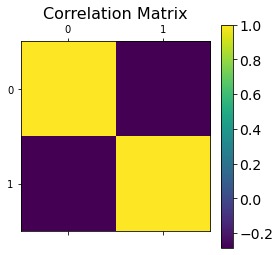

In [18]:
new = df_total[['deathspercapita', 'dosepercapita']].copy()
f = plt.figure(figsize=(15, 15))
plt.matshow(new.corr(), fignum=3)

cb = plt.colorbar(fraction=0.1)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Conclusion (5 marks)

### Achievements
_As  expected, all the signs point towards the vaccines being a very effective solution at preventing death from covid. There is a significant negative corellation between death and vaccine rates from data collected from the ECDC. On the other hand, most european countries as of 28th of October 2021, are on high risk covid levels. Despite the vaccines, people and the authorities must remain alert for what the future comes._

### Limitations
_This project was done in a limited timeframe and as a result, some less important details were omitted. As can be seen in the vaccine dataset, more than 5 different vaccines are administered. It is expected that not all vaccines are equally effective, but analysing each vaccine individually would be time consuming. Moreover, daily data from before March 2021 are not available. As a result the deaths per 100,000 population ratio is not totally accurate. It is possible that vaccines would prove to be even more effective if death data for a longer time period were to be used._

### Future Work
_Graphs from this project show that there is some variance among the fatality rates of different european countries. Although the variance among vaccine rates is definitely a big factor for this, it is possible that there are other factors as well. For example, different protocols and strategies followed when preventing or treating covid may prove to be more or less effective. The answer is definitely in the data available and it would be interesting to explore possible links in a future project._